### Name: Mayur Jain
### Div: BE10-Q10
### Roll no: 43230
### Title: Assignment 2: Implementing Feedforward neural networks with Keras and TensorFlow

In [41]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [42]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [43]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [44]:
#building the model
model = Sequential()
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [45]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01),metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 2.2902 - accuracy: 0.1904 - val_loss: 2.2524 - val_accuracy: 0.2930
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2276 - accuracy: 0.3688 - val_loss: 2.1978 - val_accuracy: 0.4278
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.1646 - accuracy: 0.4705 - val_loss: 2.1226 - val_accuracy: 0.5002
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 2.0754 - accuracy: 0.5199 - val_loss: 2.0149 - val_accuracy: 0.5746
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.9504 - accuracy: 0.5669 - val_loss: 1.8681 - val_accuracy: 0.5936
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7899 - accuracy: 0.5991 - val_loss: 1.6920 - val_accuracy: 0.6406
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.6107 - accuracy: 0.6482 - val_loss: 1.5095 - val_accuracy: 0.6543
Epoch 

In [46]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       980
           1       0.75      0.99      0.85      1135
           2       0.86      0.68      0.76      1032
           3       0.66      0.86      0.75      1010
           4       0.82      0.81      0.81       982
           5       0.79      0.51      0.62       892
           6       0.82      0.87      0.84       958
           7       0.72      0.88      0.79      1028
           8       0.85      0.49      0.63       974
           9       0.75      0.62      0.68      1009

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.76     10000
weighted avg       0.78      0.77      0.76     10000



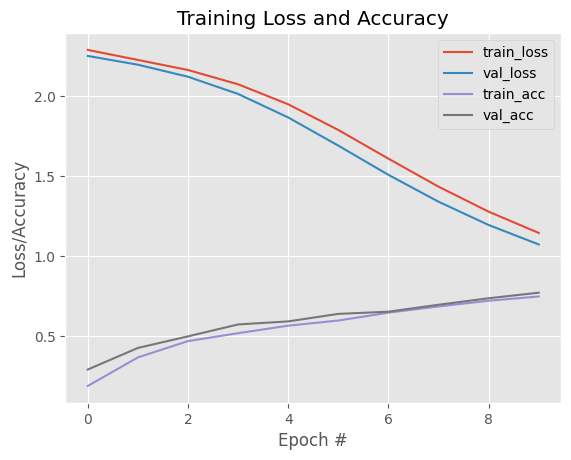

In [47]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()